# Seaborn

Seaborn is a visualization library that sits on top of matplotlib, making it nicer to look at and adding some extra capabilities too.

## Exercise

Explore the relationship between the number of gears a car has, and its combined MPG rating. What conclusions can you draw?

In [24]:
# Extract useful information from dataframe
data = df[['Mfr Name', 'Carline', 'CombMPG', '# Gears']]
display(data)

,Mfr Name,Carline,CombMPG,# Gears
0,aston martin,Vantage V8,21,8
1,Volkswagen Group of,Chiron,11,7
2,General Motors,CORVETTE,15,8
3,General Motors,CORVETTE,18,8
4,General Motors,CORVETTE,17,8
...,...,...,...,...
713,Toyota,4RUNNER 4WD,18,5
714,Toyota,LAND CRUISER WAGON 4WD,15,8
715,Toyota,SEQUOIA 4WD,14,6
716,Volvo,XC90 AWD,22,8


Visualize these two dimensions using a scatter plot.

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

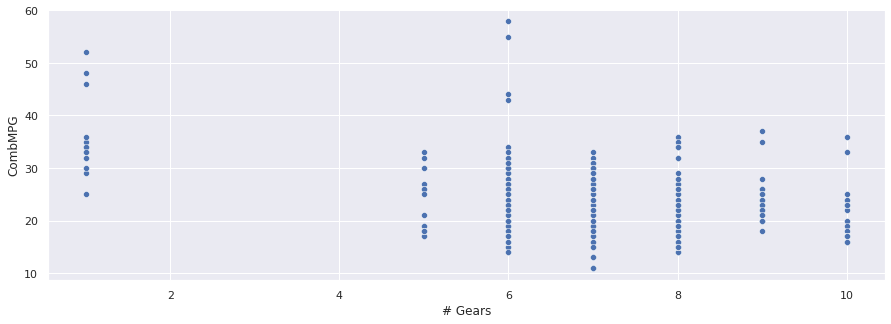

In [25]:
sns.scatterplot(x='# Gears', y="CombMPG", data=data)

The number of gears is categorical data that ranges from 0 to 10, as seen on the x-axis. As the number of gears increases, there is a downward trend in MPG - this can be seen where the data points are clustered. It seems that having 1 or 6 gears has high MPG ratings.

Visualize these two dimensions using a lmplot.

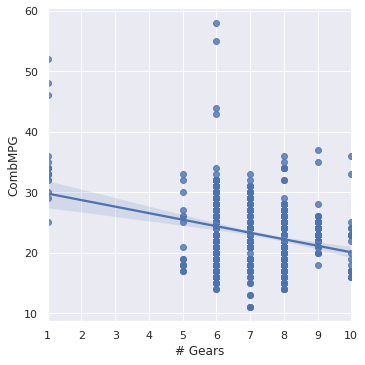

In [26]:
sns.lmplot(x='# Gears', y="CombMPG", data=data)

This plot shows a scatter plot with a linear regression line applied on top and it shows that the decreasing trend more apparently. It seems that having more gears is not better when it comes to efficiency. 

Visualize these two dimensions using a jointplot.

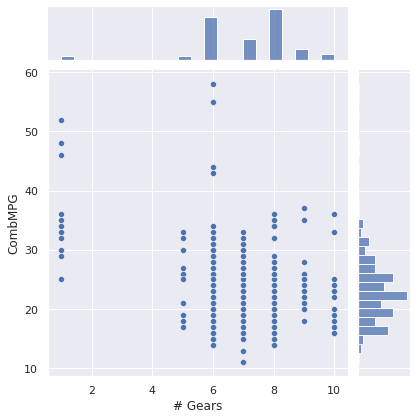

In [27]:
sns.jointplot(x='# Gears', y="CombMPG", data=data)

This plot shows a scatter plot with histograms on each axis, which represents the distribution of the individual features. The most popular gear configuration is 8 and then 6. The most common MPG rating is around 22. 

Visualize these two dimensions using a boxplot.

<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

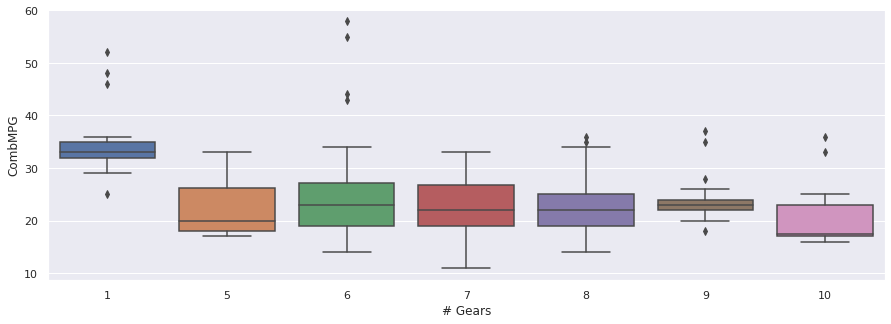

In [28]:
sns.boxplot(x='# Gears', y="CombMPG", data=data)

This graph shows box plots of the range of MPG values that are seen on each gearbox type. The distribution is not as varied as it was in scatterplots, many extreme values are outliers. However, it does further prove that single gear cars are very good with fuel efficiency (as higher MPGs are more efficient). There is not much of a difference between haveing 5, 6, 7, or 8 gears. But more than 8 gears decreases efficiency. 

Visualize these two dimensions using a swarmplot.

/home/ubuntu/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='# Gears', ylabel='CombMPG'>

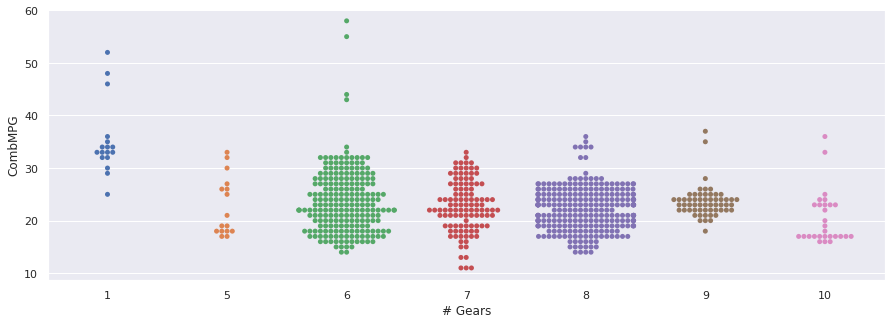

In [29]:
sns.swarmplot(x='# Gears', y="CombMPG", data=data)

This swarm plot makes it even more apparent that there are many outliers on the 6 gear vehicles since the vast majority of them have less than 32 MPG. 

As a conclusion, more gears results in worse fuel efficiency. 